In [1]:
import matplotlib.pyplot as plt
from PIL import Image

In [2]:
import numpy as np
import cv2

def generate_random_colors(num_colors=512):
    # Generate random RGB colors for the specified number of colors
    back_ground = np.expand_dims(np.array([0, 0, 0]), axis=0)
    colors = np.random.randint(0, 256, size=(num_colors, 3), dtype=np.uint8)
    
    colors = np.concatenate((back_ground, colors), axis=0)
    
    return colors

def map_segmentation_to_colors(segmentation_result, colors):
    # Create an empty image with the same shape as the segmentation result
    height, width = segmentation_result.shape
    colored_segmentation = np.zeros((height, width, 3), dtype=np.uint8)

    # Map each class label to its corresponding color
    for class_label, color in enumerate(colors):
        colored_segmentation[segmentation_result == class_label] = color

    return colored_segmentation


In [53]:
colors = generate_random_colors(num_colors=512)
print(colors)

[[  0   0   0]
 [110   8  72]
 [175 198   0]
 ...
 [162  20 177]
 [245 152 200]
 [ 38 143  62]]


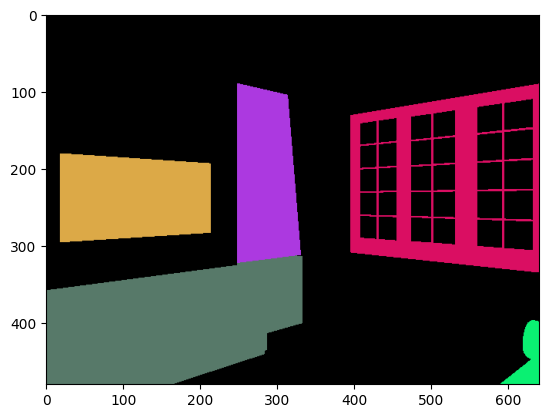

In [61]:
# Example segmentation result (replace this with your actual segmentation result)
segmentation_result = np.load("e:\Workspace\Datasets\iGibson-dataset\iGibson-pano-obj-data\Beechwood_1_int/0/0\seg/0000_7.npy").squeeze()
segmentation_result[segmentation_result == 4] = 0
segmentation_result[segmentation_result == 5] = 0
segmentation_result[segmentation_result == 6] = 0


colors = generate_random_colors(512)
segmentation_mask = map_segmentation_to_colors(segmentation_result, colors)

plt.imshow(segmentation_mask)
plt.show()

In [60]:
segmentation_result = np.load("e:\Workspace\Datasets\iGibson-dataset\iGibson-pano-obj-data\Beechwood_1_int/0/0\seg/0000_7.npy").squeeze()

print(segmentation_result.shape)

print(segmentation_result[371][558]) # wall
print(segmentation_result[47][331]) # ceiling
print(segmentation_result[435][359]) # floor
print(segmentation_result[283][611]) # none


(480, 640)
4
6
5
0


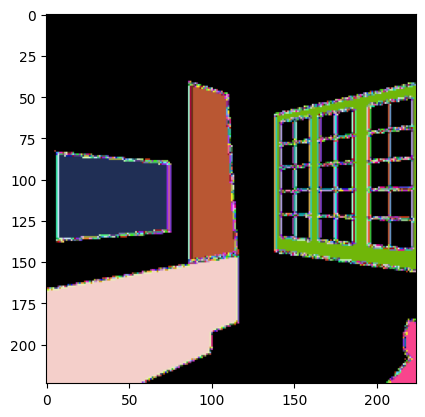

In [4]:
# Example segmentation result (replace this with your actual segmentation result)
segmentation_result = np.load("e:\Workspace\Datasets\iGibson-dataset\iGibson-pano-obj-data\Beechwood_1_int/0/0\seg/0000_7.npy").squeeze()
segmentation_result[segmentation_result == 4] = 0
segmentation_result[segmentation_result == 5] = 0
segmentation_result[segmentation_result == 6] = 0

segmentation_result = (Image.fromarray(segmentation_result)).resize((224, 224))
segmentation_result = np.array(segmentation_result)


colors = generate_random_colors(512)
segmentation_mask = map_segmentation_to_colors(segmentation_result, colors)

plt.imshow(segmentation_mask)
plt.show()